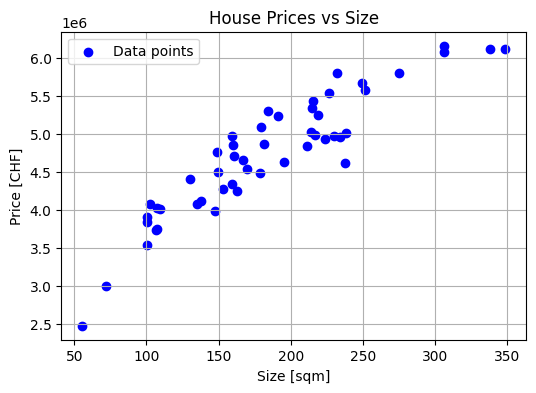

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from util import load_house_data, plot_housing_prices, plot_fit_landscape_and_loss, \
    animate_gradient_descent, plot_loss_landscape

# load the housing prices data
sizes, prices, _ = load_house_data('data/housing_prices.txt')

# plot the data
plot_housing_prices(sizes, prices)

In [ ]:
# scale the data such that the features are centered around zero and have reasonable range
####### YOUR CODE HERE #######
x = ...
y = ...
####### END YOUR CODE ########

# plot the scaled data
plot_housing_prices(x, y, scaled=True)

In [ ]:
# Calculate loss (Mean Squared Error) for each combination of w and b
def calculate_loss(w, b, x_data, y_data):
    ####### YOUR CODE HERE #######
    y_pred = ...
    loss = ...
    ###### END YOUR CODE ########
    return loss

# Create ranges for w and b to plot loss surface
w_range = np.linspace(-1, 1.5, 50)
b_range = np.linspace(-0.5, 0.5, 50)
W, B = np.meshgrid(w_range, b_range)

# Calculate loss for each combination of w and b
Loss = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Loss[i, j] = calculate_loss(W[i, j], B[i, j], x, y)

# Plot the loss surface and the data points
plot_loss_landscape(W, B, Loss)

In [ ]:
# Perform gradient descent to get optimization path
def gradient_descent_path(x_data, y_data, learning_rate=0.05, n_iterations=20):
    """Perform gradient descent and return the path"""
    # Initialize parameters (this would typically be random)
    w = -0.2
    b = 0.3
    
    # Store path
    w_path = [w]
    b_path = [b]
    loss_path = [calculate_loss(w, b, x_data, y_data)]
    
    for i in range(n_iterations):
        ###### YOUR CODE HERE #######
        # Calculate predictions
        y_pred = ...
        
        # Calculate gradients
        dw = ...
        db = ...
        
        # Update parameters
        w -= ...
        b -= ...
        ###### END YOUR CODE ########
        
        # Store path
        w_path.append(w)
        b_path.append(b)
        loss_path.append(calculate_loss(w, b, x_data, y_data))
    
    return np.array(w_path), np.array(b_path), np.array(loss_path)


w_path, b_path, loss_path = gradient_descent_path(x, y, learning_rate=0.2, n_iterations=40)

anim = animate_gradient_descent(
    W, B, Loss, x, y, w_path, b_path, loss_path,
    # save_path="output/gradient-descent-animation.mp4",
)

from IPython.display import HTML
HTML(anim.to_jshtml())
